In [5]:
# Simple Linear Regression Example

# pip install sklearn
# pip install quandl
# pip install pandas

In [80]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split # for cross_validation
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # how to plot
from matplotlib import style # make the plot look decent
import pickle

style.use('ggplot') # decent in what way

In [21]:
#working with google stock free dataset available
df = quandl.get('WIKI/GOOGL')
#print(df.head())

In [12]:
# keeping the columns we want to use
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [13]:
# finding the relationship btw features
df['HL_Percent'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
df['Percent_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100

In [19]:
# keeping the important columns only
df = df[['Adj. Close','HL_Percent', 'Percent_change', 'Adj. Volume']]
#print(df.head())

In [70]:
#start forecasting
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True) # fill in the missing data
forecast_out = int(math.ceil(0.01*len(df))) # 10% of the dataset
df['label'] = df[forecast_col].shift(-forecast_out) # creating the label
#df.dropna(inplace=True)
#print(df.head())

In [71]:
X = np.array(df.drop(['label'],1)) # making features, a numpy array with everything except the lable column
X = preprocessing.scale(X) # Scaling X, to decrease the computations (processing time) and increase precision?
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label']) # making labels, a numpy array with just label column
#print(len(X),len(y))

3221 3221


C:\Users\mahva\AppData\Local\Temp/ipykernel_21936/2781307659.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['label'],1)) # making features, a numpy array with everything except the lable column


In [72]:
#split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
# the classifier!!
clf = LinearRegression() # define classifier, clf = LinearRegression(n_jobs=10) to run jobs/threads: -1 for as many as possible by the hardware
#clf = svm.SVR(kernel = 'poly') # changing the algorithm to support vector regression
clf.fit(X_train, y_train) # fit the classifier to the training dataset

# saving the classifier, so less need to train it every time
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
    
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test) # test the classifier
print(accuracy)

0.9719967684240309


In [83]:
# predicting
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[ 872.41195079  875.20144559  874.29375508  894.38202578  904.2496021
  905.83498041  906.51810161  940.03932654  948.12238317  951.69546674
  962.71611952  969.49707633  967.38296803  972.41342716  973.02034163
  971.18138486  970.75833975  971.10257886  973.85610871  979.46188661
  963.96451649  965.01883112  968.39593127  977.84206956  986.33678053
  992.62853466 1005.94909382 1008.49398796 1009.8075954  1006.64330903
 1005.8848395  1010.10477622 1018.26016613] 0.9719967684240309 33


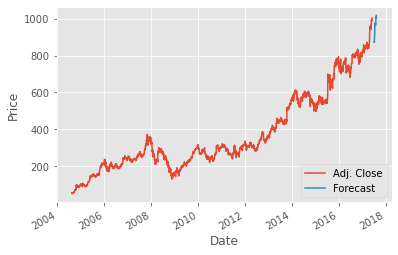

In [84]:
# visualization
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

# populate dataframe with "new dates" and forecasted values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] # making evry oclumn NaN and add the forecast value to the last column on that specific label (date)

#print(df.head()) #to check what the for loop did to the data.
#print(df.tail())


# plotting
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4) # bottom right
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [103]:
# building linear regression FROM SCRATCH
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random # pseudo-random numbers

style.use('fivethirtyeight')

0.9248515726670744


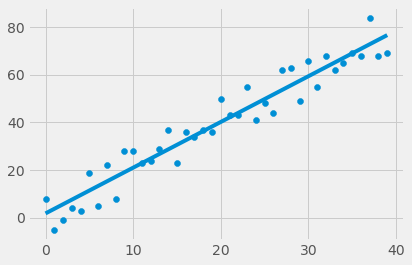

In [112]:
# xs = np.array([1,2,3,4,5,6], dtype = np.float64)
# ys = np.array([5,4,6,5,6,7], dtype = np.float64)

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        if correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

# defining the slope and the y-intercept
def best_fit_slope_and_intercept(xs,ys):
    m = ((mean(xs)*mean(ys))-(mean(xs*ys)))/((mean(xs)*mean(xs))-(mean(xs*xs)))
    b = mean(ys)-m*mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_mean = squared_error(ys_orig, y_mean_line)
    return 1-(squared_error_regr / squared_error_mean)

# create random dataset
xs, ys = create_dataset(40, 10, 2, correlation = 'pos')

m, b = best_fit_slope_and_intercept(xs,ys)
# print(m,b)

regression_line = [(m*x+b) for x in xs] #make the line with the best values for m and b calculated above

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

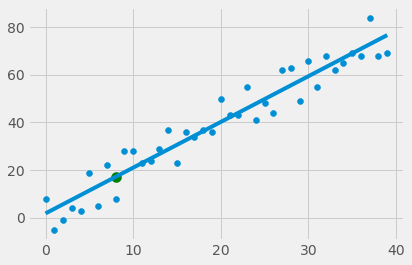

In [113]:
# prediction!
predict_x = 8
predict_y = m*predict_x + b

plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s = 100, color='g')
plt.plot(xs, regression_line)
plt.show()